#### Problem Statement:

Business case:
    
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


In [56]:
# importing required library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


%matplotlib inline

In [2]:
# read csv file 

dataset = pd.read_csv("Automobile_insurance_fraud.csv")
pd.set_option('display.max_columns',None) # set all column visible

dataset.head() # Showing top 5 rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# Size of the dataset
dataset.shape

(1000, 40)

In dataset 1000 rows and 40 column is there we need to check which feature very important to the target variable.

In [4]:
dataset['_c39'].unique() # complete feature is null value only so can drop now itself

array([nan])

In [5]:
dataset.drop('_c39',inplace=True,axis=1)  # dropped '_c39' from dataset

In [6]:
# Checking null value in the dataset

dataset.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:>

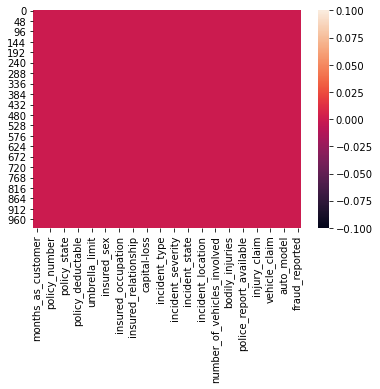

In [7]:
sns.heatmap(dataset.isnull()) # visually checking the null value

No null value present in the dataset we can move next step

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Many categorical variable present in the dataset

In [8]:
# filtering only numeric data and checking distibution

df_num =dataset.select_dtypes(include=['int64','float64'])
df_num

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>],
       [<AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>],
       [<AxesSubplot:title={'center':'vehicle_claim'}>,
        <Ax

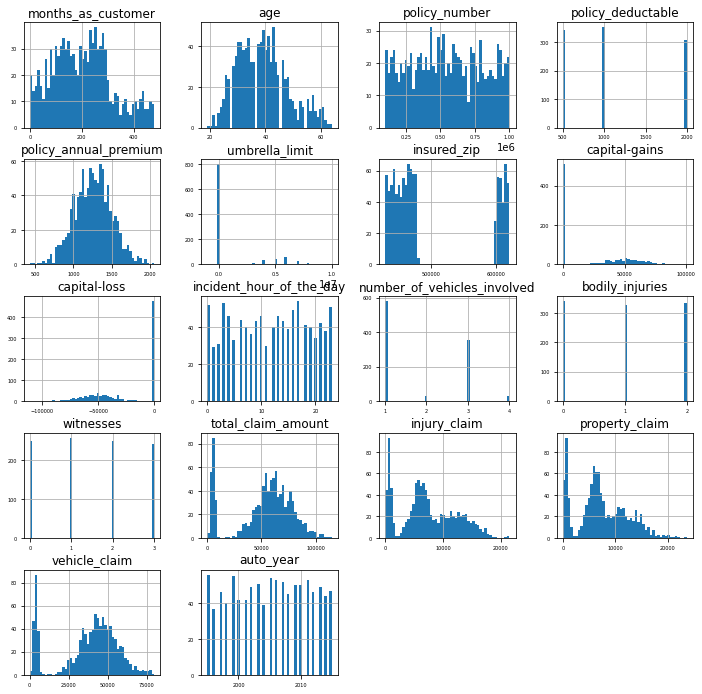

In [35]:
# Checking the distribution numerical variable
df_num.hist(figsize=(12,12),bins=50,xlabelsize=5,ylabelsize=5)

#### Observation :
    
- age,policy annual premium,total claim and vehicle claim are normal distributed.

- injury claim and property claim is right side skewed.

- Some unique and categorical value is there so apnormal distibution occuring in that.

In [18]:
cat_feature = [i for i in dataset.columns if dataset[i].dtypes == 'O']
cat_feature.remove('policy_bind_date')

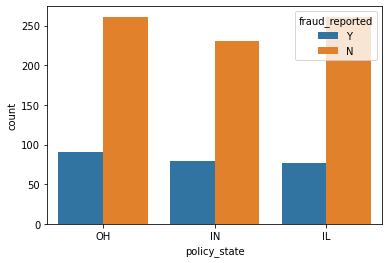

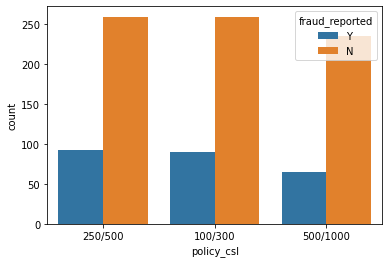

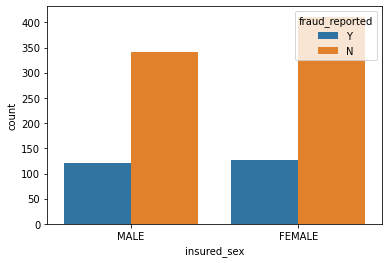

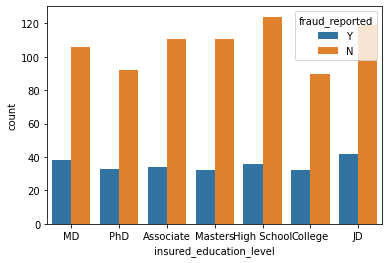

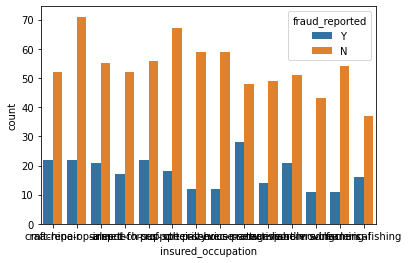

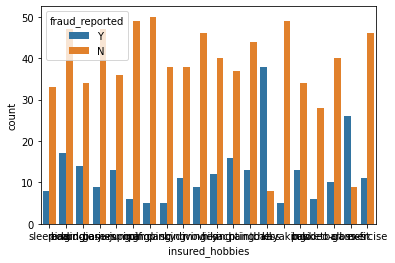

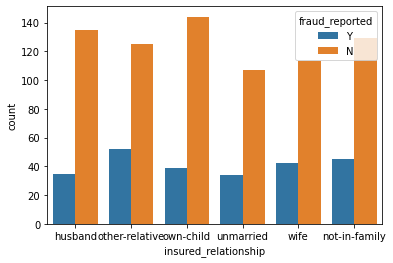

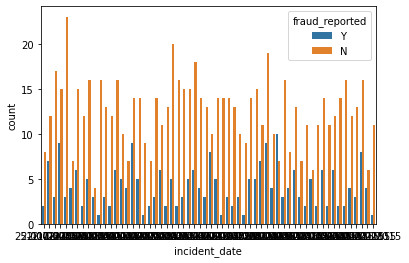

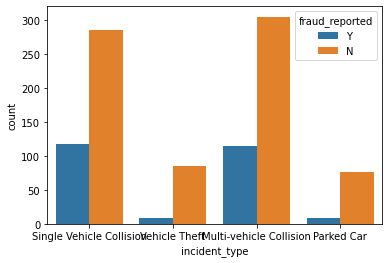

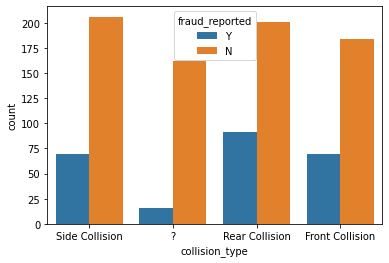

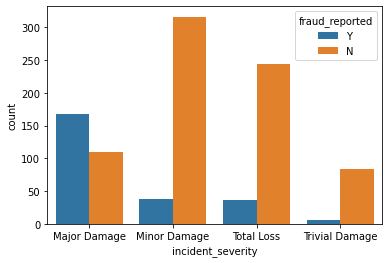

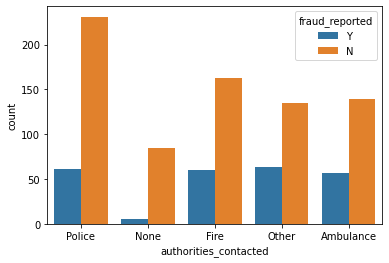

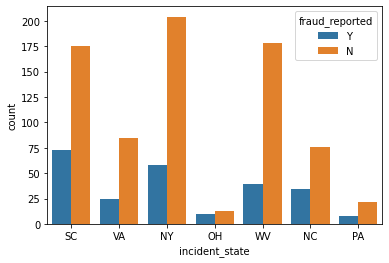

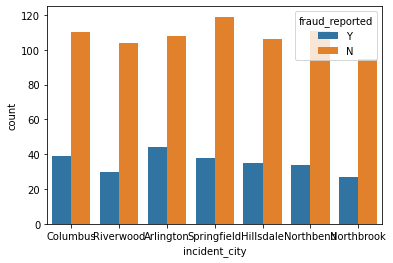

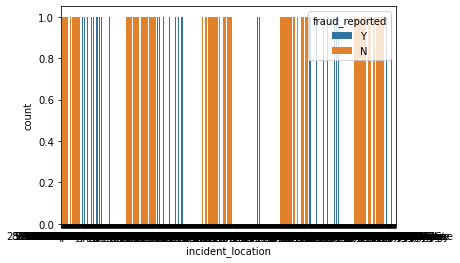

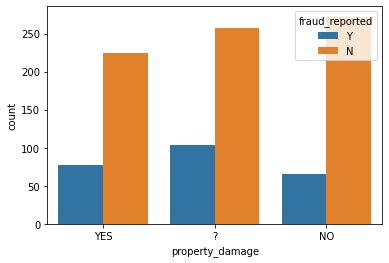

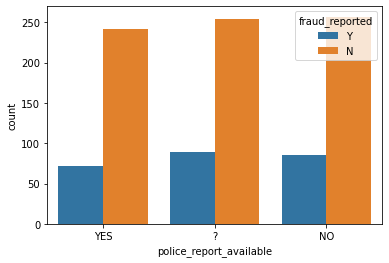

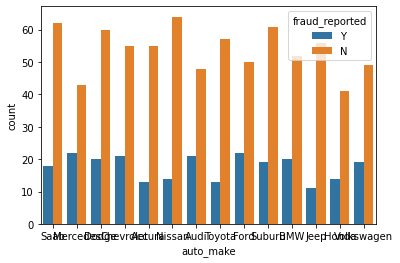

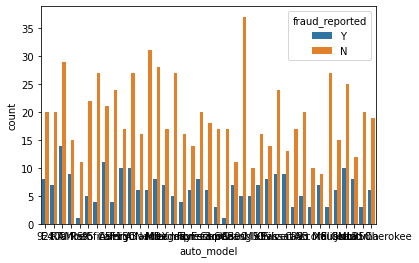

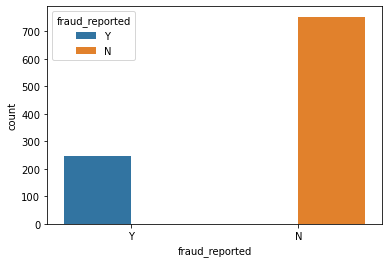

In [21]:
# Checking categorical value 
for i in cat_feature:
    plt.figure()
    sns.countplot(dataset[i],hue=dataset['fraud_reported'])
    plt.xlabel(i)

#### Observation :

1. In all 3 states average cases register as a fraud report.
2. comparing gender category in female little higher cases registered.
3. Incident data ,injured relationship not big impact.
4. Mostly accident happend due to single and multiple vehiele.
5. Mostly rear collision fraud report is more.
6. In major damage lot of fraud report is registerd.
7. SC and NY states mostly fraud report registered.

<AxesSubplot:xlabel='count', ylabel='insured_hobbies'>

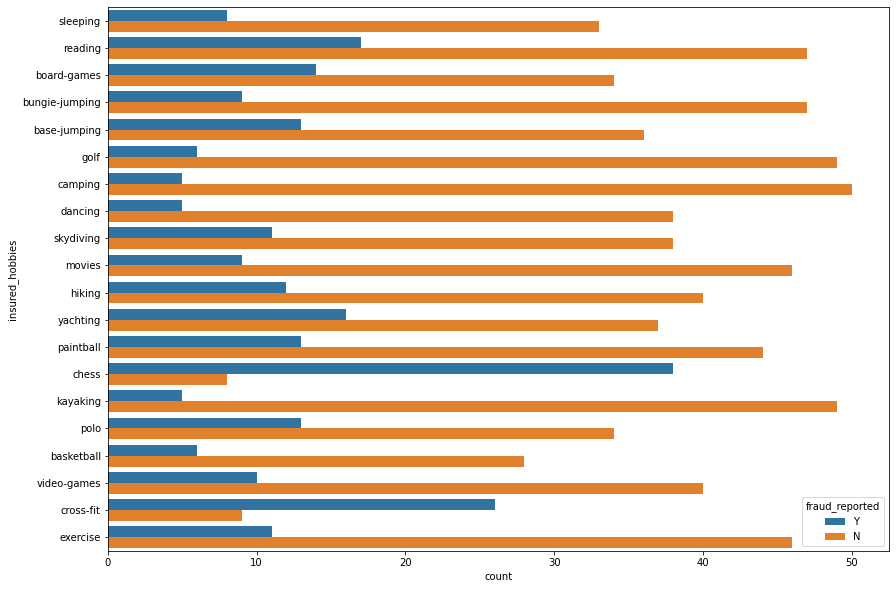

In [37]:
# Some of categories not clearly visible so we need to check univariant analysis

plt.figure(figsize=(14,10))
sns.countplot(data=dataset,y='insured_hobbies',hue='fraud_reported')

chess ,reading,crossfit guide hobbies people mostly registerd as a fraud.

<AxesSubplot:xlabel='count', ylabel='insured_occupation'>

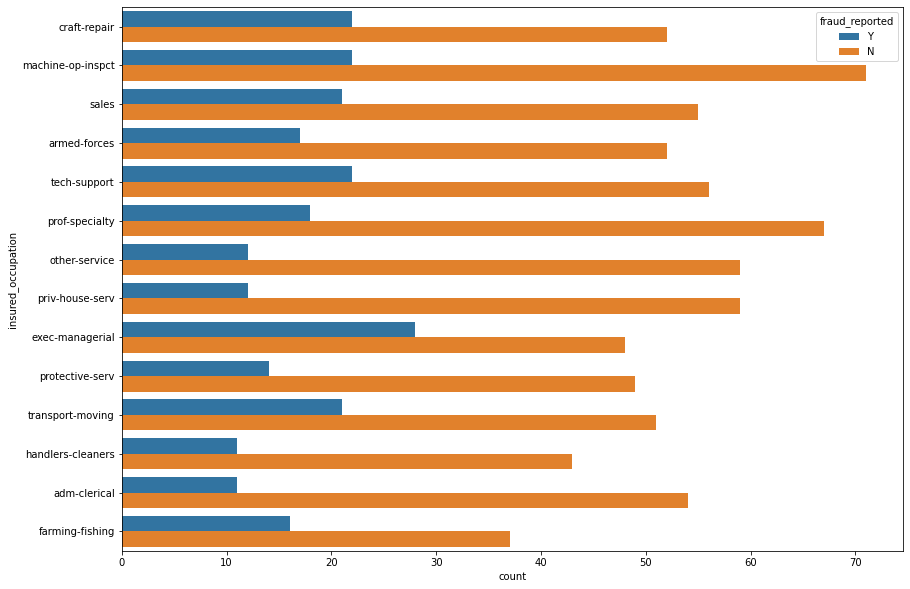

In [38]:
plt.figure(figsize=(14,10))
sns.countplot(data=dataset,y='insured_occupation',hue='fraud_reported')

Most of people in technical background and domain knowledge people is mostly case registerd.

In [39]:
# Label encoding all categorical data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # lable encoding instance 

dataset_new = dataset.copy() # making dataset copy

for i in cat_feature:
    dataset_new[i] = le.fit_transform(dataset_new[i])
    
dataset_new.head()    

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,27-06-2006,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,06-09-2000,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,25-05-1990,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,06-06-2014,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0


In [40]:
# Checking the correlation of dataset

dataset_new.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.002985,-0.017377,-0.017824,-0.059581,0.010021,0.005369,-0.000130,-0.013630,0.070639,0.014736,0.007040,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,0.002416,-0.025626,-0.018672,-0.058439,0.015417,0.005770,-0.002291,-0.011101,0.087161,0.022102,-0.001486,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,-0.037264,-0.014422,0.039896,0.017120,0.009802,-0.005669,0.053022,0.001742,-0.013402,-0.015719,0.018565,-0.010064,-0.035406,0.016393,0.000113,0.013432,0.005575,-0.004558,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.027287,0.031848,0.034739,-0.026377,-0.016777,0.008723,-0.002077,0.029534,0.029457,-0.042263,0.008623,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,-0.010140,0.011997,-0.036687,0.022530,0.056182,0.032814,0.009333,0.047704,-0.001869,-0.019403,-0.027340,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.024055,-0.038411,-0.033182,-0.015711,-0.000760,0.006517,-0.045117,-0.009281,0.060935,0.051214,0.016900,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.028257,0.053603,0.036719,-0.011155,-0.055191,0.046434,0.048724,0.017883,-0.001578,-0.045991,0.095359,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,-0.009471,0.015966,-0.025913,0.009466,0.029044,-0.077492,0.013094,0.014510,-0.023257,-0.021270,-0.056957,0.022743,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,0.027113,-0.010840,-0.045313,-0.023855,-0.017548,-0.047669,-0.017532,-0.013847,0.008274,0.027448,0.060342,0.028695,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,-0.020481,-

In [45]:
dataset_new['policy_bind_date'] = le.fit_transform(dataset_new['policy_bind_date'])

In [46]:
# Checking the skewness in the dataset

dataset_new.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [48]:
# Checking outlier in the dataset
from scipy.stats import zscore

z = np.abs(zscore(dataset_new))

In [50]:
df_new =dataset_new[(z<3).all(axis=1)]

In [51]:
df_new.shape

(980, 39)

In [52]:
dataset_new.shape  # dimentionality reduction is less only

(1000, 39)

#### Spliting X and Y Data

In [53]:
x = df_new.iloc[:,0:-1]
y = df_new.iloc[:,-1]

In [54]:
x.shape

(980, 38)

In [55]:
y.shape

(980,)

#### Finding best random state

In [57]:
maxScore = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    prec= lr.predict(x_test)
    acc =accuracy_score(y_test,prec)
    
    if acc > maxScore:
        maxScore = acc
        maxRS = i

print(f"Best random state :{maxRS} and accuracy_score:{maxScore}")

Best random state :68 and accuracy_score:0.8141592920353983


In [59]:
# Skewness removal

from sklearn.preprocessing import power_transform

df_x = power_transform(x)

df_x = pd.DataFrame(df_x,columns=x.columns)
x = df_x 

In [63]:
# Standard_Scaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x =scale.fit_transform(x)

In [64]:
# Spliting the training and testing data¶
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=68)

In [65]:
# Size of the training and testing dataset
print("X_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

X_train (754, 38)
y_train (754,)
x_test (226, 38)
y_test (226,)


In [71]:
# Checking the accuracy of the value ,confusion matrix,classification report

def metrics_model(y_test,prec):
    print("Accuracy score is",accuracy_score(y_test,prec))
    print("."*80)
    print("Confusion matrix value is:\n",confusion_matrix(y_test,prec))
    print("."*80)
    print(classification_report(y_test,prec))

#### Training and Testing the Data

In [72]:
# logistic Regression

lr = LogisticRegression()
lr.fit(x_train,y_train)
prec= lr.predict(x_test)
metrics_model(y_test,prec)

Accuracy score is 0.8053097345132744
................................................................................
Confusion matrix value is:
 [[159  26]
 [ 18  23]]
................................................................................
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       185
           1       0.47      0.56      0.51        41

    accuracy                           0.81       226
   macro avg       0.68      0.71      0.69       226
weighted avg       0.82      0.81      0.81       226



In [73]:
# cross Validation
cross = cross_val_score(LogisticRegression(),x,y,cv=5)
cross.mean()

0.7867346938775511

#### Checking with other classification model

In [74]:
dtc = DecisionTreeClassifier()
Kn  = KNeighborsClassifier(n_neighbors=5)
sv  = SVC() 

# model instance list created
model = [dtc,Kn,sv]

In [75]:
for m in model:
    print(type(m))
    print("")
    m.fit(x_train,y_train)
    prec=m.predict(x_test)
    metrics_model(y_test,prec)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Accuracy score is 0.8097345132743363
................................................................................
Confusion matrix value is:
 [[154  31]
 [ 12  29]]
................................................................................
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       185
           1       0.48      0.71      0.57        41

    accuracy                           0.81       226
   macro avg       0.71      0.77      0.73       226
weighted avg       0.85      0.81      0.82       226

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Accuracy score is 0.7389380530973452
................................................................................
Confusion matrix value is:
 [[159  26]
 [ 33   8]]
................................................................................
              precision    recall  f1-score   suppo

In [76]:
# DecisionTreeClassifier
cross = cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
cross.mean()

0.7887755102040817

In [77]:
# KNeighborsClassifier
cross = cross_val_score(KNeighborsClassifier(),x,y,cv=5)
cross.mean()

0.726530612244898

In [78]:
# SVC
cross = cross_val_score(SVC(),x,y,cv=5)
cross.mean()

0.7530612244897957

The Kneighbour accuracy score and cross validation score is almost near and further we will check with ensemble algorithm also.

#### Ensemble method

In [79]:
# Bagging
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
prec =rf.predict(x_test)
metrics_model(y_test,prec)

Accuracy score is 0.7787610619469026
................................................................................
Confusion matrix value is:
 [[155  30]
 [ 20  21]]
................................................................................
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       185
           1       0.41      0.51      0.46        41

    accuracy                           0.78       226
   macro avg       0.65      0.68      0.66       226
weighted avg       0.80      0.78      0.79       226



In [80]:
# RandomForestClassifier
cross = cross_val_score(rf,x,y,cv=5)
cross.mean()

0.7683673469387756

In [81]:
# Boosting algarithem
from sklearn.ensemble import AdaBoostClassifier

adb =AdaBoostClassifier()
adb.fit(x_train,y_train)
prec=adb.predict(x_test)
metrics_model(y_test,prec)

Accuracy score is 0.7831858407079646
................................................................................
Confusion matrix value is:
 [[156  29]
 [ 20  21]]
................................................................................
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       185
           1       0.42      0.51      0.46        41

    accuracy                           0.78       226
   macro avg       0.65      0.68      0.66       226
weighted avg       0.80      0.78      0.79       226



In [82]:
# Adabooster
cross = cross_val_score(AdaBoostClassifier(),x,y,cv=5)
cross.mean()

0.7979591836734694

Finally Random forest model is giving very good result.

#### HyperParameterTuning

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
params = {'n_estimators':[100,150,200],'criterion':['gini', 'entropy'],
          'max_features':['auto', 'sqrt', 'log2']}

In [85]:
gr = GridSearchCV (RandomForestClassifier(),param_grid=params,cv=5)
gr.fit(x,y)
gr.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}

In [86]:
rf =RandomForestClassifier(n_estimators=100,criterion='gini',max_features='log2')
rf.fit(x_train,y_train)
prec =rf.predict(x_test)
metrics_model(y_test,prec)

Accuracy score is 0.7920353982300885
................................................................................
Confusion matrix value is:
 [[162  23]
 [ 24  17]]
................................................................................
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       185
           1       0.42      0.41      0.42        41

    accuracy                           0.79       226
   macro avg       0.65      0.65      0.65       226
weighted avg       0.79      0.79      0.79       226



#### Metrics : AUC ROC Curve

In [87]:
from sklearn.metrics import roc_auc_score,plot_roc_curve

In [88]:
    
y_problity = rf.predict_proba(x_test,)[:,1]

In [89]:
roc_auc_score(y_test,y_problity)

0.8375741595253791

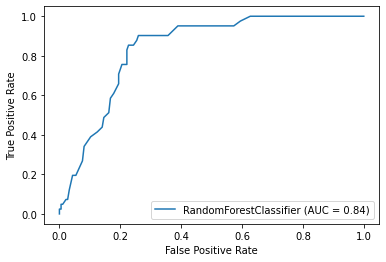

In [91]:
plot_roc_curve(rf,x_test,y_test)

#### Saving the model

In [92]:
import joblib
Auto_insu = joblib.dump(rf,"Automobile_insurance.obj")
Auto_insu

['Automobile_insurance.obj']

In [93]:
#loding model to file

test_model=joblib.load("Automobile_insurance.obj")
test_model

RandomForestClassifier(max_features='log2')